In [52]:
import os
import random
from random import randint
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

ImportError: attempted relative import with no known parent package

In [53]:
def open_raw(
    raw_file,
    imageWidth,
    imageHeight,
    umin=137,
    umax=52578,
):
    rawInFile = open(raw_file, "rb")
    rawImageArray = np.fromfile(
        rawInFile, dtype=np.float32, count=imageHeight * imageWidth
    )
    rawRGBimage = Image.frombuffer(
        "I;16",
        [imageWidth, imageHeight],
        rawImageArray,  # .astype('I;16'),
        "raw",
        "I;16",
        0,
        1,
    )
    rawRGBarray = np.array(rawRGBimage)
    rawRGBarray.resize((imageHeight, imageWidth))

    rawRGBarray -= umin
    rawRGBarray = rawRGBarray / (umax - umin)

    return rawRGBarray



In [54]:
folder = f"{randint(1, 4)}"
files = os.listdir(f"../data/{folder}/")
random_file = random.choice(files)
random_file_w_path = f"../data/{folder}/{random_file}"
random_file_w_path

'../data/4/IE1705794_P406.i180702.raw'

In [55]:
imageWidth,imageHeight = 400,400

In [59]:
rawRGBarray = open_raw(random_file_w_path, imageHeight, imageWidth)
rawRGBarray.shape

(400, 400)

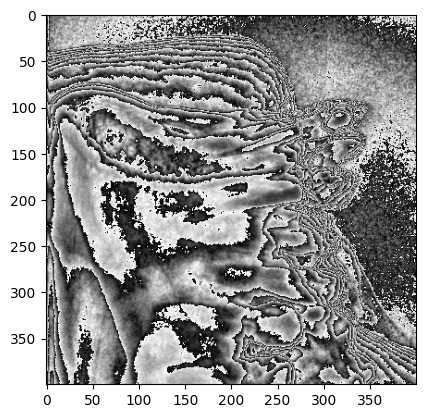

In [60]:
plt.imshow(rawRGBarray, cmap="gray")

In [61]:
rawRGBarray.shape
resized = tf.image.resize(tf.expand_dims(rawRGBarray, axis = -1), [512, 512])
resized.shape

TensorShape([512, 512, 1])

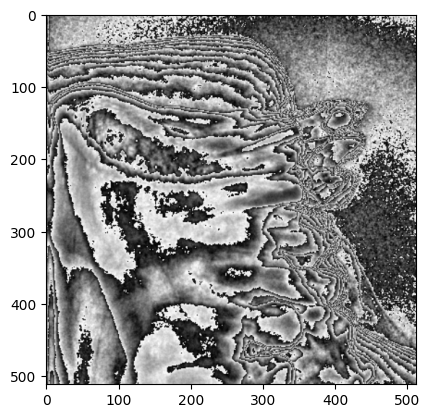

In [62]:
plt.imshow(resized.numpy(), cmap="gray")